# 1. Configuraciones

In [1]:
# Características de la MV
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [2]:
# Declarar variables
HOME ="/content/drive/MyDrive/Maestria/Tesis/DFL-BundesligaDataShootout/Experimentacion"
HOME

'/content/drive/MyDrive/Maestria/Tesis/DFL-BundesligaDataShootout/Experimentacion'

# 2. Conectarse a drive

In [3]:
# Conectarse a drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Establecer directorio de trabajo
%cd {HOME}

/content/drive/MyDrive/Maestria/Tesis/DFL-BundesligaDataShootout/Experimentacion


In [5]:
!ls -l

total 304
-rw------- 1 root root  18968 Mar  4 16:28 '1. Data download.ipynb'
-rw------- 1 root root 287620 Mar  5 01:00 '2. Data Understand.ipynb'
drwx------ 2 root root   4096 Mar  4 15:35  data


# 3. Entendiendo la data

In [6]:
import pandas as pd
train = pd.read_csv(f'{HOME}/data/train.csv')
train.head()

,video_id,time,event,event_attributes
0,1606b0e6_0,200.265822,start,NaN
1,1606b0e6_0,201.150000,challenge,['ball_action_forced']
2,1606b0e6_0,202.765822,end,NaN
3,1606b0e6_0,210.124111,start,NaN
4,1606b0e6_0,210.870000,challenge,['opponent_dispossessed']


In [ ]:
# Número de registros
train.shape

(11218, 4)

In [ ]:
# Cuanto Videos etiquetados y cuantos registros tienen?
train.video_id.value_counts().sort_index()

1606b0e6_0    1000
1606b0e6_1    1249
35bd9041_0    1075
35bd9041_1     933
3c993bd2_0    1042
3c993bd2_1     966
407c5a9e_1     858
4ffd5986_0     792
9a97dae4_1     737
cfbe2e94_0     823
cfbe2e94_1     763
ecf251d4_0     980
Name: video_id, dtype: int64

In [ ]:
# El tiempo mínimo y máximo en el que hay jugadas etiquetadas en los videos.
train.groupby('video_id').agg({'time':['min','max']})

time             
                   min          max
video_id                           
1606b0e6_0  200.265822  3014.731795
1606b0e6_1  509.821499  3387.730393
35bd9041_0  175.025822  3061.887807
35bd9041_1  556.269150  3477.711658
3c993bd2_0  239.049763  2998.972483
3c993bd2_1  476.395443  3472.401262
407c5a9e_1  458.084392  3445.221089
4ffd5986_0  221.402983  3099.628836
9a97dae4_1  566.171997  2999.676546
cfbe2e94_0  229.321518  3216.907029
cfbe2e94_1  637.111502  3575.000727
ecf251d4_0  198.037984  3070.780519

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)


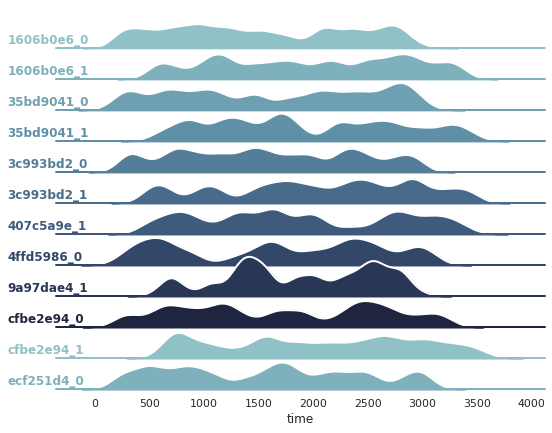

In [ ]:
# Distribución del tiempo en los que los videos tienen etiquetados jugadas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(train, row="video_id", hue="video_id", aspect=15, height=.5, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "time",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "time", clip_on=False, color="w", lw=2, bw_adjust=.5)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(-0.1, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "time")

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='event', ylabel='count'>

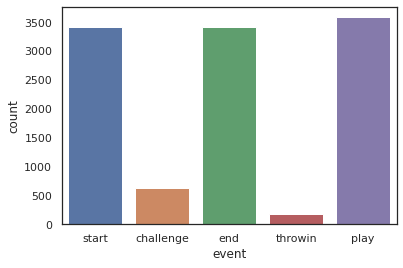

In [ ]:
# Cantidad de eventos etiquetados a nivel global y por partido.
sns.countplot(train.event)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


play         3586
challenge     624
throwin       172
Name: event, dtype: int64


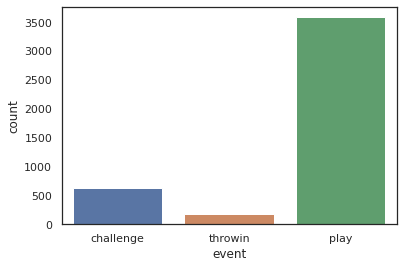

In [ ]:
# Descartando start y end
# Cantidad de eventos etiquetados a nivel global y por partido.
sns.countplot(train[~train.event.isin(['start', 'end'])].event)
print(train[~train.event.isin(['start', 'end'])].event.value_counts())

Hay un claro desbalance en las clases a favor de play

In [ ]:
import warnings
warnings.filterwarnings('ignore')

35bd9041_1


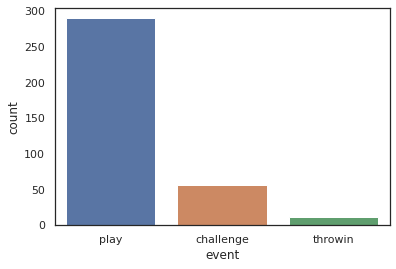

35bd9041_0


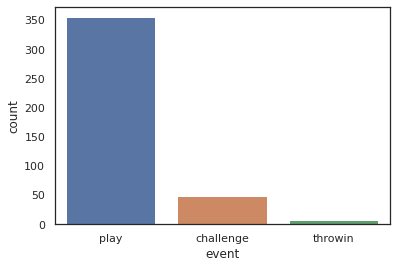

3c993bd2_1


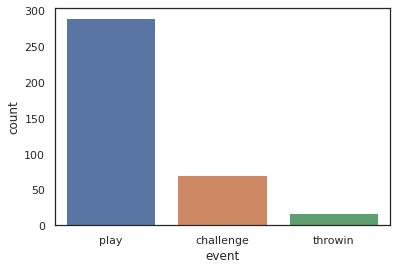

3c993bd2_0


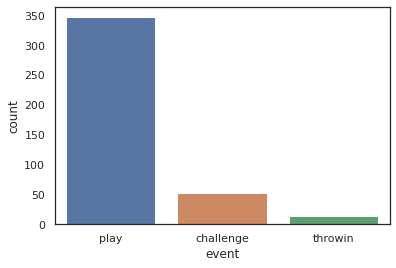

1606b0e6_0


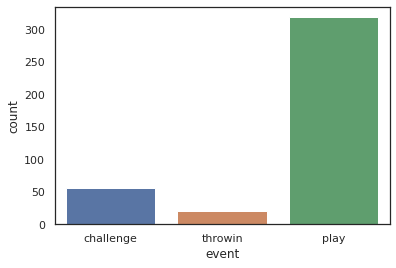

407c5a9e_1


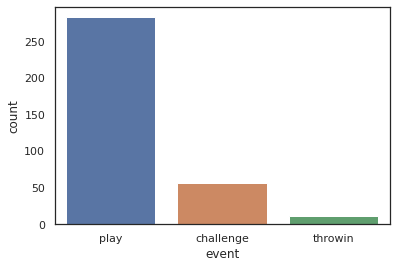

cfbe2e94_1


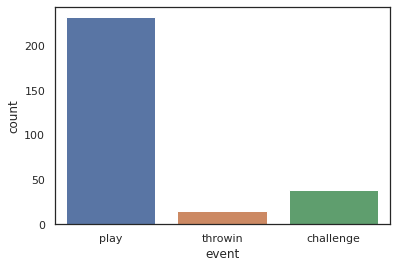

cfbe2e94_0


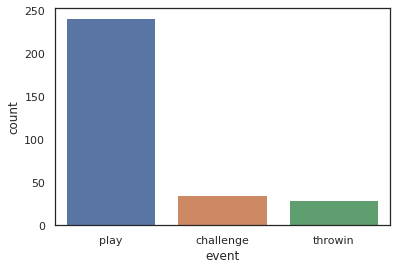

9a97dae4_1


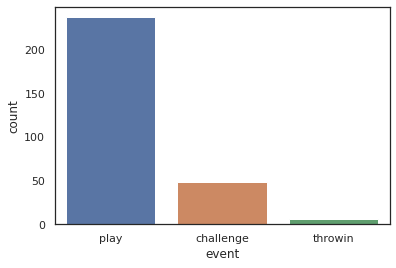

4ffd5986_0


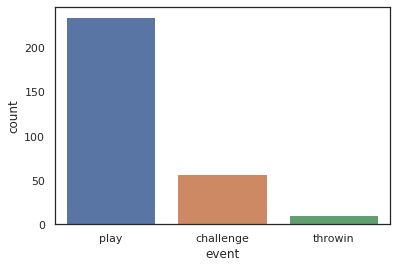

ecf251d4_0


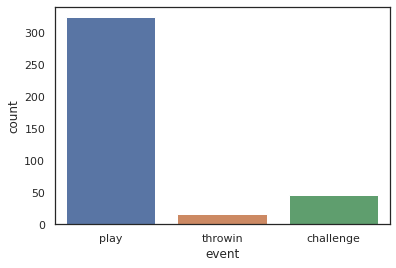

1606b0e6_1


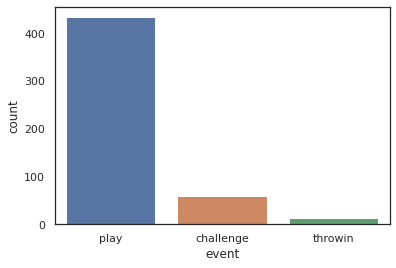

In [ ]:
for video in list(set(train.video_id)):
    print(video)
    tmp = train[train.video_id == video]
    sns.countplot(tmp[~tmp.event.isin(['start', 'end'])].event)
    plt.show()

In [ ]:
3337/(3586 + 624 + 172), 3337/(3586)

(0.7615244180739389, 0.9305633017289459)

In [7]:
# Que atributos tienen los eventos?
events = train[~train.event.isin(['start','end'])].copy()
events.groupby(['event', 'event_attributes']).size()#.reset_index()

event      event_attributes                  
challenge  ['ball_action_forced']                 239
           ['challenge_during_ball_transfer']      53
           ['fouled']                             111
           ['opponent_dispossessed']              138
           ['opponent_rounded']                    39
           ['possession_retained']                 44
play       ['cross', 'corner']                     33
           ['cross', 'freekick']                    5
           ['cross', 'openplay']                   80
           ['pass', 'corner']                       4
           ['pass', 'freekick']                   127
           ['pass', 'openplay']                  3337
throwin    ['cross']                               18
           ['pass']                               154
dtype: int64

El desbalance se produce principalmente por la presencia generalizada del evento play y los atibutos [pass, openplay], que representa el 76% de todas los eventos etiquetados y el 93% del evento play

In [ ]:
# Que atributos tienen los eventos? por video
for video in list(set(events.video_id)):
    print(video)
    print('--'*50, '\n')
    tmp = events[events.video_id == video]
    print(tmp.groupby(['event', 'event_attributes']).size())#.reset_index()

35bd9041_1
---------------------------------------------------------------------------------------------------- 

event      event_attributes                  
challenge  ['ball_action_forced']                 21
           ['challenge_during_ball_transfer']      7
           ['fouled']                             11
           ['opponent_dispossessed']              12
           ['opponent_rounded']                    3
           ['possession_retained']                 3
play       ['cross', 'corner']                     6
           ['cross', 'openplay']                   5
           ['pass', 'freekick']                   12
           ['pass', 'openplay']                  267
throwin    ['pass']                               12
dtype: int64
35bd9041_0
---------------------------------------------------------------------------------------------------- 

event      event_attributes                  
challenge  ['ball_action_forced']                 12
           ['challenge_during_b

# Descripción de los eventos.


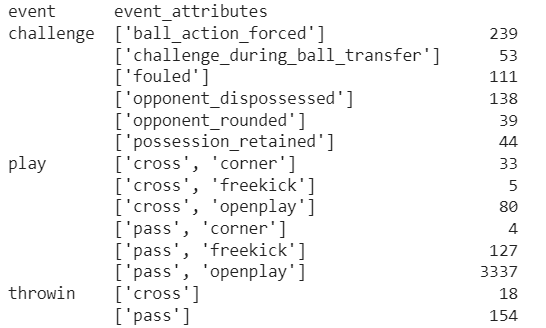

## Plays = Jugadas.
Una jugada (**Play**), describe el intento de un jugador de cambiar el control del balón a otro jugador de su equipo. Una jugada puede ejecutarse como un **Pase (Pass) o un centro (Cross)**. 

**Cross**. El hecho de que una jugada sea un centro, depende de las posiciones del jugador que centra y del jugador que recepciona el centro. El jugador que realiza el centro, debe estar ubicado aproximadamente dentro de una de las cuatro zonas de las cuales se puede centrar (Crossing Player Zone). Las cuatro zonas están delimitadas por las líneas de banda, la prolongación paralela a las líneas de banda de las líneas de penal, las líneas de meta y  las líneas imaginarias que se forman en el último cuarto del campo de fútbol tomando como base la línea central. El jugador destinatario o el que recibe el centro, debe estar ubicado aproximadamente dentro del área de penal. Además la longitud de la distancia recorrida por el balón debe ser entre media (10-30 metros)  o larga (más de 30 metros) y la altura de la pelota jugada debe ser alta (Se debe jugar por encima de la rodilla de los jugadores). Para clasificar una jugada como centro, cuando la pelota es interceptada por un rival, no es decisiva la altura real o distancia recorrida, sino la altura o distancia prevista.

**Pass**. Un pase es cualquier intento de cambiar el control del balón a otro miembro de su equipo, que no tiene las características necesarias para ser un centro.

Además, cada acción de juego, ya sea un pase o un centro se ejecuta dentro de un contexto, lo que convierte en una jugada  con balón en movimiento = Open Play, o en una jugada con balón parado (tiros de esquina o corners = Corner Kick, tiros libres = Free Kick.)

Un corner se refiere a la situación en la que se ejecuta la jugada para reiniciar el juego, después de que el balón saliera sobre la línea de meta tras el toque o roce en un jugador del equipo rival. La pelota debe patearse desde la esquina del banderín de lcorner por la que salió el balón y debe estar totalmente quieta al momento de ejecutar el corner.

Una jugada abierta = Open Play se refiere a cualquier jugada con balón en movimiento.

**Trow-Ins= Saque de Banda**.  
Se refiere a una situación en la cual el juego se reinicia, después de que el balón salió por la línea de banda tras el toque o roce en un jugador del equipo contrario. El balón debe lanzarse con las manos, por detrás y por encima de la cabeza del jugador ejecutor.

**Challenge = Desafíos =Recuperos**.  
Un desafío o un reto, es una acción de juego en la que un jugador intenta recuperar el balón para su equipo. Una recuperación requiere que uno de los dos jugadores que disputan el balón consiga su objetivo, ya sea consiguiendo la posesión del balón o cometiendo una falta al jugador contrario.
Hay diferentes tipos de recuperaciones o desafíos:  
- **Opponent rounded = Oponente superado (regate, sombrerito)**, Cuando el jugador que tiene el control del balón, permanece con él después del reto o jugada, es decir ha superado a su rival. También se consideran situaciones en las que el oponente no puede recuperar el balón (Los famosos sombreritos)
- **Ball action carried Out = Balones Divididos**. Está acción se da cuando ninguno de los jugadores que intervienen tienen el control del balón, y al final uno de ellos consigue ganar el balón para su equipo. 
- **Fouled = Faltas**. Esta acción se da cuando el árbitro sanciona falta.
- **Opponent dispossessed =  Recuperación del balón**. Un jugador que no tiene el balón le quita al otro que lo posee.
- **Challenge during release of the ball = Despejes o bloques**. Se da cuando un jugador que no posee el balón lo intercepta o lo despeja. 
- **Possession retained during challenge = Retenciones de balón**. Se da cuando el jugador que posee el balón en una jugada de juego abierto no mueve el balón por un instante prolongado.


In [8]:
events.head()

,video_id,time,event,event_attributes
1,1606b0e6_0,201.15,challenge,['ball_action_forced']
4,1606b0e6_0,210.87,challenge,['opponent_dispossessed']
7,1606b0e6_0,219.23,throwin,['pass']
10,1606b0e6_0,224.43,play,"['pass', 'openplay']"
13,1606b0e6_0,229.39,play,"['pass', 'openplay']"


In [19]:
#train['minutes'] = [divmod(x,60) for x in train.time]
train.sort_values(['video_id', 'time']).head(61)

,video_id,time,event,event_attributes,minutes
0,1606b0e6_0,200.265822,start,NaN,"(3.0, 20.265821922833112)"
1,1606b0e6_0,201.150000,challenge,['ball_action_forced'],"(3.0, 21.150000000000006)"
2,1606b0e6_0,202.765822,end,NaN,"(3.0, 22.765821922833112)"
3,1606b0e6_0,210.124111,start,NaN,"(3.0, 30.12411121907769)"
4,1606b0e6_0,210.870000,challenge,['opponent_dispossessed'],"(3.0, 30.870000000000005)"
...,...,...,...,...,...
56,1606b0e6_0,295.843603,start,NaN,"(4.0, 55.84360270045954)"
57,1606b0e6_0,296.310000,play,"['pass', 'openplay']","(4.0, 56.31)"
58,1606b0e6_0,298.790000,play,"['pass', 'openplay']","(4.0, 58.79000000000002)"
59,1606b0e6_0,300.990000,challenge,['possession_retained'],"(5.0, 0.9900000000000091)"
